In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline
print("Seaborn version: ", sns.__version__)

Seaborn version:  0.9.0


In [39]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [40]:
game_data = pd.read_csv('D1_2015_Combo_Stats.csv')
print("Number of records= ", game_data.shape[0])
game_data.head()


Number of records=  5149


,game_id,home_team,principal_team,opponent_team,game_result,game_date,principal_score,opponent_score,prn_pts_avg,prn_fg_pct,...,opp_off_rebs_avg,opp_ft_att_avg,opp_ft_pct,opp_turnover_avg,opp_win_pct,opp_allow_pts_avg,opp_allow_fg_pct,opp_allow_off_rebs_avg,opp_allow_ft_att_avg,opp_take_away_avg
0,00031772-cef1-44c2-a8db-1ccbef47690a,True,Utah Valley,Seattle,False,1/29/2016,62,73,69.611115,0.412221,...,7.833334,16.944445,0.652459,13.944445,0.352941,66.444440,0.430911,9.666667,17.500000,12.000000
1,000bc8c4-042e-4986-90c3-64e60bf1566d,True,Presbyterian,Coastal Carolina,False,2/4/2016,66,69,61.421050,0.429735,...,8.578947,18.947369,0.666667,12.157895,0.555556,64.526310,0.407795,8.368421,19.315790,9.473684
2,000f3eaa-c37e-4577-bbc3-5e07c4412a1e,False,South Alabama,Georgia State,False,1/9/2016,55,70,61.615383,0.393258,...,4.636363,18.545454,0.725490,11.000000,0.700000,56.454544,0.392233,7.636363,19.000000,11.454545
3,0012eab2-237c-4df1-846b-36430530867f,False,South Alabama,LSU,False,11/20/2015,66,78,35.000000,0.315068,...,8.000000,18.333334,0.636364,6.000000,1.000000,46.333332,0.380952,7.000000,13.666667,8.666667
4,0013581b-1b6f-4851-9bd5-4a6f91294537,False,Indiana State,Illinois State,False,2/18/2016,50,78,67.923080,0.408805,...,9.111111,17.962963,0.663918,11.814815,0.576923,64.333336,0.437048,7.629630,19.481482,13.259259


In [41]:
game_data = game_data[game_data['game_date'] > '2015-12-15']

encode_game_result = {"game_result": {False: "LOSS", True: "WIN"}}
game_data.replace(encode_game_result, inplace=True)
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 11 to 5125
Data columns (total 32 columns):
game_id                   632 non-null object
home_team                 632 non-null bool
principal_team            632 non-null object
opponent_team             632 non-null object
game_result               632 non-null object
game_date                 632 non-null object
principal_score           632 non-null int64
opponent_score            632 non-null int64
prn_pts_avg               632 non-null float64
prn_fg_pct                632 non-null float64
prn_off_rebs_avg          632 non-null float64
prn_ft_att_avg            632 non-null float64
prn_ft_pct                632 non-null float64
prn_turnover_avg          632 non-null float64
prn_win_pct               632 non-null float64
prn_allow_pts_avg         632 non-null float64
prn_allow_fg_pct          632 non-null float64
prn_allow_off_rebs_avg    632 non-null float64
prn_allow_ft_att_avg      632 non-null float64
prn_take_awa

In [42]:
numeric_feature_to_scale = ['prn_pts_avg', 'prn_off_rebs_avg', 'prn_ft_att_avg', 'prn_turnover_avg',
                           'prn_allow_pts_avg','prn_allow_off_rebs_avg', 'prn_allow_ft_att_avg', 'prn_take_away_avg',
                           'opp_pts_avg', 'opp_off_rebs_avg','opp_ft_att_avg', 'opp_turnover_avg',
                           'opp_allow_pts_avg', 'opp_allow_off_rebs_avg', 'opp_allow_ft_att_avg',
                            'opp_take_away_avg']

game_data_scale = game_data[numeric_feature_to_scale].copy()
scaler =StandardScaler()
scaled_features = scaler.fit_transform(game_data_scale.values)
scaled_df = pd.DataFrame(scaled_features, index=game_data_scale.index, columns=game_data_scale.columns)

# Add the categorical columns and previously scaled numerics 
scaled_df['home_team'] = game_data['home_team']
scaled_df['prn_fg_pct'] = game_data['prn_fg_pct']
scaled_df['prn_ft_pct'] = game_data['prn_ft_pct']
scaled_df['prn_win_pct'] = game_data['prn_win_pct']
scaled_df['prn_allow_fg_pct'] = game_data['prn_allow_fg_pct']
scaled_df['opp_fg_pct'] = game_data['opp_fg_pct']
scaled_df['opp_ft_pct'] = game_data['opp_ft_pct']
scaled_df['opp_win_pct'] = game_data['opp_win_pct']
scaled_df['opp_allow_fg_pct'] = game_data['opp_allow_fg_pct']


scaled_df.head()


,prn_pts_avg,prn_off_rebs_avg,prn_ft_att_avg,prn_turnover_avg,prn_allow_pts_avg,prn_allow_off_rebs_avg,prn_allow_ft_att_avg,prn_take_away_avg,opp_pts_avg,opp_off_rebs_avg,...,opp_take_away_avg,home_team,prn_fg_pct,prn_ft_pct,prn_win_pct,prn_allow_fg_pct,opp_fg_pct,opp_ft_pct,opp_win_pct,opp_allow_fg_pct
11,0.649948,-0.506753,0.040408,-0.488518,-0.611483,-0.237971,-2.059677,-1.128064,1.548812,0.485153,...,-0.268402,True,0.483313,0.711628,0.766667,0.410996,0.458561,0.679012,0.656250,0.412940
15,2.482749,0.591707,1.859940,-0.449519,1.608659,1.135477,0.178670,-0.380679,0.692307,-0.468072,...,0.212383,True,0.458778,0.768966,0.666667,0.433396,0.460104,0.703650,0.666667,0.440439
18,-0.479904,0.129112,-0.294644,0.355606,-0.595230,0.308920,-0.258912,-1.530969,-0.339052,1.070245,...,-1.346978,True,0.445504,0.669145,0.576923,0.405863,0.446136,0.736752,0.548387,0.409836
26,0.524691,0.312264,1.579736,0.183261,1.443372,2.833922,1.706081,1.651829,0.832286,-0.770943,...,-0.272638,False,0.440079,0.730253,0.461538,0.436198,0.459380,0.756803,0.551724,0.437685
27,0.745768,1.064402,1.893515,0.052312,-0.108719,1.213600,0.877826,0.806487,0.094881,-0.640594,...,-0.486375,False,0.413927,0.723940,0.575758,0.398709,0.459445,0.784560,0.696970,0.381867


In [43]:
X = scaled_df
y= game_data['game_result'].copy()
y = pd.get_dummies(y, columns=['game_result'], drop_first=True)
y=y.WIN
X = pd.get_dummies(X, columns=['home_team'], drop_first=True)
print(X.shape)
X.head()

(632, 25)


,prn_pts_avg,prn_off_rebs_avg,prn_ft_att_avg,prn_turnover_avg,prn_allow_pts_avg,prn_allow_off_rebs_avg,prn_allow_ft_att_avg,prn_take_away_avg,opp_pts_avg,opp_off_rebs_avg,...,opp_take_away_avg,prn_fg_pct,prn_ft_pct,prn_win_pct,prn_allow_fg_pct,opp_fg_pct,opp_ft_pct,opp_win_pct,opp_allow_fg_pct,home_team_True
11,0.649948,-0.506753,0.040408,-0.488518,-0.611483,-0.237971,-2.059677,-1.128064,1.548812,0.485153,...,-0.268402,0.483313,0.711628,0.766667,0.410996,0.458561,0.679012,0.656250,0.412940,1
15,2.482749,0.591707,1.859940,-0.449519,1.608659,1.135477,0.178670,-0.380679,0.692307,-0.468072,...,0.212383,0.458778,0.768966,0.666667,0.433396,0.460104,0.703650,0.666667,0.440439,1
18,-0.479904,0.129112,-0.294644,0.355606,-0.595230,0.308920,-0.258912,-1.530969,-0.339052,1.070245,...,-1.346978,0.445504,0.669145,0.576923,0.405863,0.446136,0.736752,0.548387,0.409836,1
26,0.524691,0.312264,1.579736,0.183261,1.443372,2.833922,1.706081,1.651829,0.832286,-0.770943,...,-0.272638,0.440079,0.730253,0.461538,0.436198,0.459380,0.756803,0.551724,0.437685,0
27,0.745768,1.064402,1.893515,0.052312,-0.108719,1.213600,0.877826,0.806487,0.094881,-0.640594,...,-0.486375,0.413927,0.723940,0.575758,0.398709,0.459445,0.784560,0.696970,0.381867,0


In [44]:
print(y.shape)

(632,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(505, 25)
(505,)
(127, 25)
(127,)


,prn_pts_avg,prn_off_rebs_avg,prn_ft_att_avg,prn_turnover_avg,prn_allow_pts_avg,prn_allow_off_rebs_avg,prn_allow_ft_att_avg,prn_take_away_avg,opp_pts_avg,opp_off_rebs_avg,...,opp_take_away_avg,prn_fg_pct,prn_ft_pct,prn_win_pct,prn_allow_fg_pct,opp_fg_pct,opp_ft_pct,opp_win_pct,opp_allow_fg_pct,home_team_True
399,-0.681535,0.135980,0.177474,0.082725,0.886826,0.128562,0.926463,-0.600242,-1.553941,-1.835465,...,0.053450,0.428227,0.716535,0.310345,0.458333,0.410749,0.696552,0.344828,0.472042,1
722,-0.181776,-1.804722,-1.027485,-1.460309,0.894239,-0.609263,-1.489426,0.187772,-0.885551,-0.787762,...,-0.308702,0.428885,0.746528,0.419355,0.461957,0.405764,0.708141,0.266667,0.447201,1
1837,-0.048485,0.332790,0.730749,0.586392,-0.340506,-0.609263,0.839742,0.861950,-0.647191,-0.722062,...,-1.194124,0.458254,0.699695,0.642857,0.419142,0.444378,0.681895,0.580645,0.406888,1
484,0.664133,-0.847157,1.174057,0.322779,0.833508,1.635834,-0.286710,-0.896304,-0.028859,0.337029,...,0.752207,0.450300,0.750751,0.629630,0.436266,0.451673,0.669377,0.413793,0.464098,1
4919,0.943109,0.441304,0.932736,-0.563572,-0.215415,0.302957,-0.650983,1.088483,0.777905,-0.640594,...,-1.411824,0.461948,0.717277,0.812500,0.428726,0.485171,0.715116,0.781250,0.412152,1


In [46]:
logreg = LogisticRegression()

result = logreg.fit(X_train,y_train)

print("Coeffs ",logreg.coef_)
print("Intercept ", logreg.intercept_)

Coeffs  [[ 0.4225623   0.04090316  0.01150077 -0.29950693 -0.49756427  0.08203659
   0.00542417  0.15328396 -0.40795104 -0.22779109  0.06133271 -0.05800708
   0.57883992 -0.00735987  0.37342957 -0.24251414  0.07728054 -0.128755
   0.63160842 -0.03147381 -0.1924059  -0.24874207 -0.23523026 -0.04497551
   1.05902294]]
Intercept  [-0.17516321]


In [47]:
y_pred = logreg.predict(X_test)
print("LR model accuracy is %2.2f" % metrics.accuracy_score(y_test, y_pred))

LR model accuracy is 0.69


In [48]:
prediction_probabilities = logreg.predict_proba(X_test)
prediction_probabilities[:,1]
pred_probs = pd.Series(prediction_probabilities[:,1], index=X_test.index)
predictions = pd.Series(y_pred, index=y_test.index)
print(y_pred.shape)

(127,)


In [49]:
# Retrieve the non-normalized game stats
test_games = game_data[game_data.index.isin(X_test.index)].copy()
test_games.shape

test_games['predicted_result'] = predictions
test_games['pred_win_prob'] = pred_probs

encode_pred_result = {"predicted_result": {0: "LOSS", 1: "WIN"}}
test_games.replace(encode_pred_result, inplace=True)

test_games.head()

,game_id,home_team,principal_team,opponent_team,game_result,game_date,principal_score,opponent_score,prn_pts_avg,prn_fg_pct,...,opp_ft_pct,opp_turnover_avg,opp_win_pct,opp_allow_pts_avg,opp_allow_fg_pct,opp_allow_off_rebs_avg,opp_allow_ft_att_avg,opp_take_away_avg,predicted_result,pred_win_prob
53,02b10b71-b143-4ebf-a6b9-1c97ee6d7b39,True,Northwestern,Nebraska,WIN,3/6/2016,65,54,69.96774,0.453134,...,0.720070,11.225806,0.466667,66.225810,0.436681,7.709677,20.354840,12.129032,WIN,0.761700
68,0360c21b-af4a-48d9-a9e4-8682e5a0d8a5,True,Hawaii,Long Beach State,WIN,3/13/2016,64,60,75.00000,0.459345,...,0.680174,11.406250,0.580645,71.250000,0.445756,8.656250,21.031250,13.062500,WIN,0.883981
107,050c83ef-1e5d-4228-800e-fea078fd0fe8,False,Texas,Oklahoma State,WIN,3/5/2016,62,50,69.67742,0.433080,...,0.737190,11.645162,0.400000,64.870964,0.406250,10.032258,21.903225,10.903226,WIN,0.700895
121,05ca1dbd-3051-4c11-b26c-ed072e323a2a,True,Eastern Washington,Weber State,LOSS,3/5/2016,77,79,77.35714,0.487646,...,0.670165,12.571428,0.703704,65.500000,0.418002,8.107142,16.642857,10.535714,LOSS,0.447412
146,06c5df58-51e1-44f4-a509-ae640cc126f0,False,Pittsburgh,Wisconsin,LOSS,3/18/2016,43,47,73.40625,0.459189,...,0.707493,10.060606,0.625000,62.606060,0.429326,7.666666,17.696970,11.575758,LOSS,0.387235


Text(0.5,1,'Probabilities For Missed Predictions')

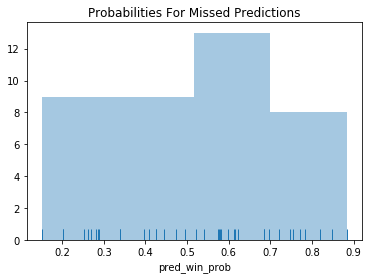

In [50]:
missed_predictions = test_games[test_games['game_result'] != 
                                test_games['predicted_result']].sort_values(by='pred_win_prob', ascending=False)

missed_predictions.pred_win_prob

sns.distplot(missed_predictions.pred_win_prob, kde=False, rug=True).set_title("Probabilities For Missed Predictions")

Text(0.5,1,'Probabilities For Correct Predictions')

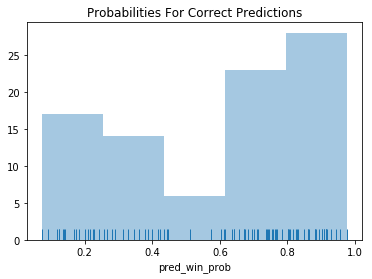

In [51]:
correct_predictions = test_games[test_games['game_result'] == 
                                test_games['predicted_result']].sort_values(by='pred_win_prob', ascending=False)

sns.distplot(correct_predictions.pred_win_prob, kde=False, rug=True).set_title("Probabilities For Correct Predictions")